In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/blaubach/chimes_CGD-myLLFork/dissimilarity_clustering


In [3]:
# Get the current working directory
cwd = os.getcwd()

# Define file paths with cwd appended
file_path_2b = os.path.join(cwd, "dft_pds/2b_all_pd")
file_path_3b = os.path.join(cwd, "dft_pds/3b_all_pd")
file_path_4b = os.path.join(cwd, "dft_pds/4b_all_pd")
file_path_labels = os.path.join(cwd, "dft_pds/labels_pd")
file_path_natoms = os.path.join(cwd, "test_notebooks/energies_per_atom.txt")

# Open pickle files with the updated file paths
with open(file_path_2b, 'rb') as pickle_file:
    pd_2b = pickle.load(pickle_file)

with open(file_path_3b, 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

with open(file_path_4b, 'rb') as pickle_file:
    pd_4b = pickle.load(pickle_file)

with open(file_path_labels, 'rb') as pickle_file:
    labels = pickle.load(pickle_file)

natom_list = []

# Open the text file for reading
with open(file_path_natoms, 'r') as file:

    # Read the contents of the file
    lines = file.readlines()[1:]

    # Iterate through each line
    for line in lines:

        # Split the line into words
        words = line.split()
        natoms = line.split("|")[1].strip()

        # Extract the last word, assuming it's a number
        last_number = float(words[-1])
        if words[0][-1] == 'z':
            print(words[0])
            continue
        natom_list.append(natoms)

natom_list = np.array(natom_list[:-10])

# Combine the arrays along the second axis (axis=1)
all_array = np.concatenate((pd_2b, pd_3b, pd_4b), axis=2)
all_array = all_array.reshape(-1, all_array.shape[2])
print(np.shape(all_array))
df_fingerprints = pd.DataFrame(all_array)

# Define the column labels for each set of columns
column_labels_2b = [f'2B_{i}' for i in range(60)]
column_labels_3b = [f'3B_{i}' for i in range(60)]
column_labels_4b = [f'4B_{i}' for i in range(60)]

# Assign the column labels to the DataFrame
column_labels = column_labels_2b + column_labels_3b + column_labels_4b
df_fingerprints.columns = column_labels

# Add a new column "labels" to the DataFrame and assign the new vector to it
df_fingerprints['labels'] = labels

# Calculate the row-wise mean using `mean(axis=1)`
row_avg = df_fingerprints.mean(axis=1)

# Append the calculated row-wise mean as a new column named "Pavg"
df_fingerprints['Pavg'] = row_avg

# Calculate the row-wise standard deviation using `std(axis=1)`
row_std = df_fingerprints.std(axis=1)

# Append the calculated row-wise standard deviation as a new column named "Pstd"
df_fingerprints['Pstd'] = row_std

# Append Natoms to Dataframe
df_fingerprints['Natoms'] = natom_list

# Display the DataFrame with the new column
print(df_fingerprints.head())


training_data_#0000.xyz
training_data_#0050.xyz
training_data_#0055.xyz
training_data_#0060.xyz
training_data_#0075.xyz
training_data_#0080.xyz
training_data_#0110.xyz
(300, 180)
       2B_0      2B_1      2B_2      2B_3      2B_4      2B_5      2B_6  \
0  0.151940  0.079974  0.039987  0.134957  0.000000  0.039987  0.000000   
1  0.151838  0.089548  0.030670  0.107863  0.026939  0.039628  0.000530   
2  0.152059  0.091794  0.027968  0.104630  0.029103  0.039305  0.001128   
3  0.113888  0.093885  0.074372  0.063481  0.048075  0.037675  0.033869   
4  0.118745  0.094125  0.073008  0.061039  0.048168  0.036493  0.032401   

       2B_7      2B_8      2B_9  ...  4B_54  4B_55  4B_56  4B_57  4B_58  \
0  0.059981  0.000000  0.064979  ...    0.0    0.0    0.0    0.0    0.0   
1  0.059527  0.008709  0.053400  ...    0.0    0.0    0.0    0.0    0.0   
2  0.058054  0.005966  0.057973  ...    0.0    0.0    0.0    0.0    0.0   
3  0.031662  0.025958  0.021373  ...    0.0    0.0    0.0    0.0    0.

Row with the smallest pij value:
2B_0      0.097704
2B_1      0.082399
2B_2      0.070194
2B_3      0.061471
2B_4      0.053926
            ...   
4B_59          0.0
labels          11
Pavg      0.077133
Pstd      0.814352
Natoms         200
Name: 275, Length: 184, dtype: object
First 5 rows with the smallest pij values:
Row index: 275, pij value: -0.039372287981303454
Row index: 278, pij value: -0.039372250522068455
Row index: 277, pij value: -0.03937220395222873
Row index: 282, pij value: -0.03937219603960037
Row index: 294, pij value: -0.03937218997079767


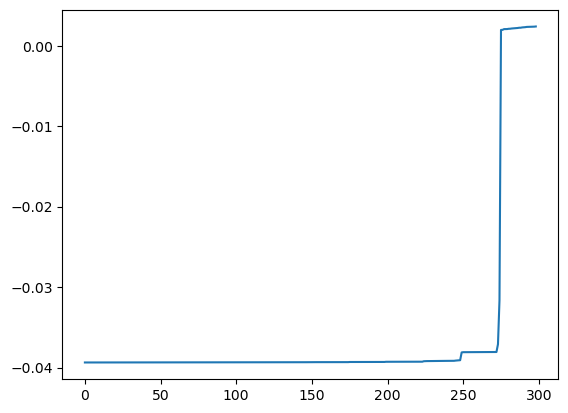

In [4]:
# Proof of concept

# Choose arbitrary starting point
phi1 = df_fingerprints.iloc[0]
phi1_fingerprint = phi1.iloc[:-4]
avg_phi1 = phi1.iloc[-3]
std_phi1 = phi1.iloc[-2]
natoms_phi1 = float(phi1.iloc[-1])

# Compute correlation
diff_phi1 = np.sum(phi1_fingerprint-avg_phi1)
pij_list = []
min_pij = np.inf  # Initialize min_pij to positive infinity
min_row_index = None  # Initialize min_row_index to None
smallest_pij_values = [(np.inf, None)] * 5

# Iterate over each row in df_fingerprints
for index, row in df_fingerprints.iterrows():
    # Skip the first row as it was already selected as phi1
    if index == 0:
        continue
    
    # Select the fingerprint and relevant values for phi2
    phi2_fingerprint = row.iloc[:-4]
    avg_phi2 = row.iloc[-3]
    std_phi2 = row.iloc[-2]
    natoms_phi2 = float(row.iloc[-1])

    # Compute correlation
    diff_phi2 = np.sum(phi2_fingerprint - avg_phi2)
    numerator = diff_phi1 * diff_phi2
    denominator = natoms_phi1 * std_phi1 * std_phi2
    pij = numerator / denominator
    pij_list.append(pij)
        # Update min_pij and min_row_index if current pij is smaller
    if pij < min_pij:
        min_pij = pij
        min_row_index = index
    # Update the list of smallest pij values
    smallest_pij_values.sort()  # Sort the list to ensure smallest values are at the beginning
    if pij < smallest_pij_values[-1][0]:
        smallest_pij_values[-1] = (pij, index)

plt.plot(sorted(pij_list))
# Print the row with the smallest pij value
print("Row with the smallest pij value:")
print(df_fingerprints.iloc[min_row_index])

# Print the first 5 rows with the smallest pij values
print("First 5 rows with the smallest pij values:")
for pij_value, row_index in smallest_pij_values:
    print(f"Row index: {row_index}, pij value: {pij_value}")
    #print(df_fingerprints.iloc[row_index])

# In theory, would add these frames to the TS, but they are all from the same SP -> probably correlated


In [5]:
# Define the size of each chunk
chunk_size = 25

# Initialize an empty list to store the chunks
chunk_list = []

# Iterate over the rows of df_fingerprints in chunks of size chunk_size
for i in range(0, len(df_fingerprints), chunk_size):
    # Select a chunk of rows
    chunk = df_fingerprints.iloc[i:i+chunk_size]
    
    # Assign the chunk to a variable with a dynamic name (e.g., sp1, sp2, ...)
    globals()[f'sp{i//chunk_size + 1}'] = chunk
    
    # Append the chunk to the list
    chunk_list.append(chunk)

# Now, sp1, sp2, ..., will contain the first 25, next 25, ..., rows of df_fingerprints
print(np.shape(chunk_list))


(12, 25, 184)


In [6]:
import numpy as np
# Initialize the master list to store selected rows
master_row_list = []

# Define the function to compute pij
def compute_pij(row1, row2, avg1, std1, natoms1):
    diff_row2 = np.sum(row2 - avg1)
    numerator = np.sum(row1 * diff_row2)
    denominator = natoms1 * std1 * np.sqrt(np.sum(row2 * row2))
    pij = numerator / denominator
    return pij

# Initialize list to store pij values
pij_list = []

# Initialize variables to track the minimum pij value and its corresponding indices
min_pij = np.inf
min_chunk_index = None
min_row_index = None

# Select the first row in the first index of the first element in chunk_list
phi1 = chunk_list[0].iloc[0]
phi1_fingerprint = phi1.iloc[:-4]
avg_phi1 = phi1.iloc[-3]
std_phi1 = phi1.iloc[-2]
natoms_phi1 = float(phi1.iloc[-1])
previous_chunk = 0

# Iterate over each chunk in chunk_list
for chunk_index, chunk in enumerate(chunk_list):
    # Skip the chunk if it's the current chunk containing phi1
    if chunk_index == previous_chunk:
        continue
    
    # Iterate over each row in the chunk
    for index, row in chunk.iterrows():
        phi2_fingerprint = row.iloc[:-4]
        avg_phi2 = row.iloc[-3]
        std_phi2 = row.iloc[-2]
        
        # Compute pij
        pij = compute_pij(phi1_fingerprint, phi2_fingerprint, avg_phi1, std_phi1, natoms_phi1)
        
        # Append pij to pij_list
        pij_list.append(pij)

        # Update min_pij and corresponding indices if current pij is smaller
        if pij < min_pij:
            min_pij = pij
            min_chunk_index = chunk_index
            min_row_index = index

# Print the minimum pij value and its corresponding chunk index/row
print("Minimum pij value:", min_pij)
print("Corresponding chunk index:", min_chunk_index)
print("Corresponding row index:", min_row_index)

master_row_list.append(df_fingerprints.iloc[min_row_index])
phi1 = df_fingerprints.iloc[min_row_index]
phi1_fingerprint = phi1.iloc[:-4]
avg_phi1 = phi1.iloc[-3]
std_phi1 = phi1.iloc[-2]
natoms_phi1 = float(phi1.iloc[-1])
previous_chunk = 0

# Remove the selected row from a copy of the original chunks
chunk_list_copy = [chunk.copy() for chunk in chunk_list]
chunk_list_copy[min_chunk_index].drop(min_row_index, inplace=True)
chunk_list_copy[min_chunk_index].reset_index(drop=True, inplace=True)

# Update chunk_list with the modified copy
chunk_list = chunk_list_copy
for i in chunk_list:
    print(np.shape(i))

# Initialize list to store pij values
pij_list = []

# Initialize variables to track the minimum pij value and its corresponding indices
min_pij = np.inf
min_chunk_index = None
min_row_index = None

# Iterate over each chunk in chunk_list
for chunk_index, chunk in enumerate(chunk_list):
    # Skip the chunk if it's the current chunk containing phi1
    if chunk_index == previous_chunk:
        continue
    
    # Iterate over each row in the chunk
    for index, row in chunk.iterrows():
        phi2_fingerprint = row.iloc[:-4]
        avg_phi2 = row.iloc[-3]
        std_phi2 = row.iloc[-2]
        
        # Compute pij
        pij = compute_pij(phi1_fingerprint, phi2_fingerprint, avg_phi1, std_phi1, natoms_phi1)
        
        # Append pij to pij_list
        pij_list.append(pij)

        # Update min_pij and corresponding indices if current pij is smaller
        if pij < min_pij:
            min_pij = pij
            min_chunk_index = chunk_index
            min_row_index = index

# Print the minimum pij value and its corresponding chunk index/row
print("Minimum pij value:", min_pij)
print("Corresponding chunk index:", min_chunk_index)
print("Corresponding row index:", min_row_index)

master_row_list.append(df_fingerprints.iloc[min_row_index])
previous_chunk = min_chunk_index
master_row_list.append(df_fingerprints.iloc[min_row_index])
phi1 = df_fingerprints.iloc[min_row_index]
phi1_fingerprint = phi1.iloc[:-4]
avg_phi1 = phi1.iloc[-3]
std_phi1 = phi1.iloc[-2]
natoms_phi1 = float(phi1.iloc[-1])
previous_chunk = 2

# Remove the selected row from a copy of the original chunks
chunk_list_copy = [chunk.copy() for chunk in chunk_list]
chunk_list_copy[min_chunk_index].drop(min_row_index, inplace=True)
chunk_list_copy[min_chunk_index].reset_index(drop=True, inplace=True)

# Update chunk_list with the modified copy
chunk_list = chunk_list_copy
for i in chunk_list:
    print(np.shape(i))

# Initialize list to store pij values
pij_list = []

# Initialize variables to track the minimum pij value and its corresponding indices
min_pij = np.inf
min_chunk_index = None
min_row_index = None

# Iterate over each chunk in chunk_list
for chunk_index, chunk in enumerate(chunk_list):
    # Skip the chunk if it's the current chunk containing phi1
    if chunk_index == previous_chunk:
        continue
    
    # Iterate over each row in the chunk
    for index, row in chunk.iterrows():
        phi2_fingerprint = row.iloc[:-4]
        avg_phi2 = row.iloc[-3]
        std_phi2 = row.iloc[-2]
        
        # Compute pij
        pij = compute_pij(phi1_fingerprint, phi2_fingerprint, avg_phi1, std_phi1, natoms_phi1)
        
        # Append pij to pij_list
        pij_list.append(pij)

        # Update min_pij and corresponding indices if current pij is smaller
        if pij < min_pij:
            min_pij = pij
            min_chunk_index = chunk_index
            min_row_index = index

# Print the minimum pij value and its corresponding chunk index/row
print("Minimum pij value:", min_pij)
print("Corresponding chunk index:", min_chunk_index)
print("Corresponding row index:", min_row_index)

master_row_list.append(df_fingerprints.iloc[min_row_index])

# Remove the selected row from a copy of the original chunks
chunk_list_copy = [chunk.copy() for chunk in chunk_list]
chunk_list_copy[min_chunk_index].drop(min_row_index, inplace=True)
chunk_list_copy[min_chunk_index].reset_index(drop=True, inplace=True)

# Update chunk_list with the modified copy
chunk_list = chunk_list_copy
for i in chunk_list:
    print(np.shape(i))

Minimum pij value: -0.32690084708411954
Corresponding chunk index: 2
Corresponding row index: 58


(25, 184)
(25, 184)
(24, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
Minimum pij value: -2.089406796394786
Corresponding chunk index: 2
Corresponding row index: 23
(25, 184)
(25, 184)
(23, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
Minimum pij value: -0.15700834850304587
Corresponding chunk index: 3
Corresponding row index: 79
(25, 184)
(25, 184)
(23, 184)
(24, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)
(25, 184)


In [8]:
print(min_row_index)

79
